In [1]:
# Problem Statement:
# Pick up the following stocks and generate forecasts accordingly Stocks:
# 1. NASDAQ.AAPL
# 2. NASDAQ.ADP
# 3. NASDAQ.CBOE
# 4. NASDAQ.CSCO
# 5. NASDAQ.EBAY

In [2]:
# Core Libraries - Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import sys
import seaborn as sns
import matplotlib
%matplotlib inline

# Core Libraries - Machine Learning
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr

C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('G:\Datasets\data_stocks.csv')

In [4]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ_AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ_ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
df.rename(columns={'NASDAQ_EBAY':'EBAY'}, inplace=True)    # renaming column name i.e removing special characters

In [6]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ_AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ_ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [7]:
df['DATE_F'] = df.DATE.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

In [8]:
df['logEBAY'] = np.log(df['EBAY'])
df['diflogEBAY'] = df['logEBAY']-df['logEBAY'].shift(periods=1)
df=df.dropna()

In [9]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ_AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ_ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,DATE_F,logEBAY,diflogEBAY
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,39.88,82.03,7.38,50.22,63.74,121.770,53.350,2017-04-03 19:01:00,3.508406,-0.000075
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,39.98,82.02,7.36,50.12,63.75,121.700,53.365,2017-04-03 19:02:00,3.508855,0.000449
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,39.99,82.02,7.35,50.16,63.88,121.700,53.380,2017-04-03 19:03:00,3.506608,-0.002247
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,39.96,82.03,7.36,50.20,63.91,121.695,53.240,2017-04-03 19:04:00,3.508556,0.001948
5,1491226500,2365.6201,42.5399,143.7800,130.0700,82.040,102.0400,85.9200,59.610,121.70,...,39.96,82.03,7.36,50.20,63.84,121.850,53.220,2017-04-03 19:05:00,3.509454,0.000898


In [10]:
data = df[['DATE','DATE_F','EBAY','logEBAY','diflogEBAY']][:-100]
test = df[['DATE','DATE_F','EBAY','logEBAY','diflogEBAY']][-100:]

In [11]:
data.shape

(41165, 5)

In [12]:
data.head()

,DATE,DATE_F,EBAY,logEBAY,diflogEBAY
1,1491226260,2017-04-03 19:01:00,33.395,3.508406,-0.000075
2,1491226320,2017-04-03 19:02:00,33.410,3.508855,0.000449
3,1491226380,2017-04-03 19:03:00,33.335,3.506608,-0.002247
4,1491226440,2017-04-03 19:04:00,33.400,3.508556,0.001948
5,1491226500,2017-04-03 19:05:00,33.430,3.509454,0.000898


In [13]:
indexed_df = data.set_index('DATE_F')

In [14]:
dataset = indexed_df['EBAY']
dataset.head(5)

DATE_F
2017-04-03 19:01:00    33.395
2017-04-03 19:02:00    33.410
2017-04-03 19:03:00    33.335
2017-04-03 19:04:00    33.400
2017-04-03 19:05:00    33.430
Name: EBAY, dtype: float64

In [15]:
# log transform for better interpretation 
df['logEBAY'] = np.log(df['EBAY'])      

# shift index by desired number of periods with an optional time freq
df['diflogEBAY'] = df['logEBAY'] - df['logEBAY'].shift(periods=-1) 

df = df.dropna()   # remove missing values

In [16]:
data = df[['DATE','EBAY','logEBAY','diflogEBAY']]

In [17]:
data.head()

,DATE,EBAY,logEBAY,diflogEBAY
1,1491226260,33.395,3.508406,-0.000449
2,1491226320,33.410,3.508855,0.002247
3,1491226380,33.335,3.506608,-0.001948
4,1491226440,33.400,3.508556,-0.000898
5,1491226500,33.430,3.509454,-0.001046


# Find optimal parameters and build an ARIMA model

To apply an ARIMA model to our time series, we need to find optimal values for the following three model parameters (p,d,q):

The number of autoregressive (AR) terms (p): AR terms are just lags of the dependent variable. So, if p=2, it means that predictors of x(t) will be x(t-1) and x(t-2).

The number of moving average (MA) terms (q): MA terms are lagged forecast errors in the prediction equation. For instance, if q=2, the predictors for x(t) will be e(t-1) and e(t-2) where e(i) is the difference between the moving average at i-th instant and the actual value.

The number of differences (d): These are the number of non-seasonal differences. If, d=1, it meanns using the first order differenced time series.

There are two ways to determine the number of AR and MA terms. The first is to use the arma_order_select_ic function in Python. The second uses plots of the autocorrelation function (ACF) and partial autocorrelation function (PACF).

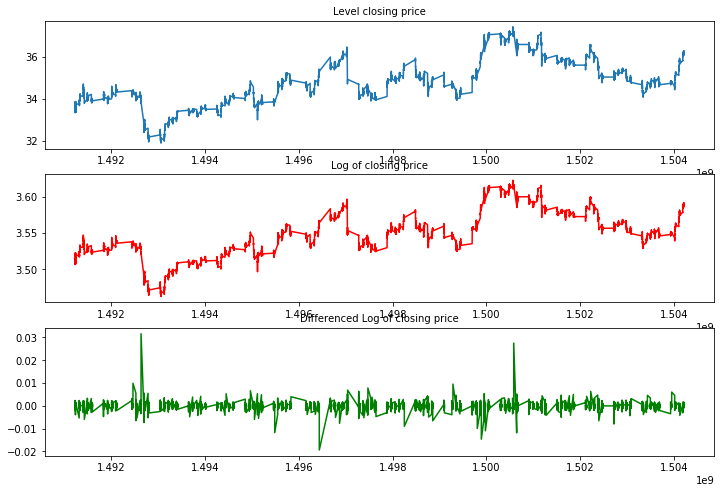

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3,1,1)
plt.plot (data.DATE,data.EBAY,label="EBAY Price")
plt.title("Level closing price", size=10)
#plt.ylable("Price in dollars",size=10)

plt.subplot(3,1,2)
plt.plot (data.DATE,data.logEBAY,label="Log of EBAY", color='r')
plt.title("Log of closing price", size=10)
#plt.ylable("Price in Log Dollars",size=10)

plt.subplot(3,1,3)
plt.plot (data.DATE,data.diflogEBAY,label="1st difference  of Log of EBAY", color='g')
plt.title("Differenced Log of closing price", size=10)
#plt.ylable("Differenced Closing Price",size=10)
#plt.xlabel('Day',size=10)

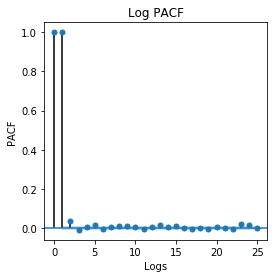

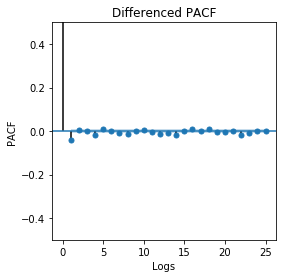

In [19]:
fig, ax = plt.subplots(figsize=(4,4))

#PACF displays and plots the sample partial autocorrelation function of one or more time series
plot_pacf(data.logEBAY, lags = 25, ax = ax)
ax.set_title('Log PACF')    
ax.set_xlabel('Logs')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.diflogEBAY, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Logs')
ax.set_ylabel('PACF')

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


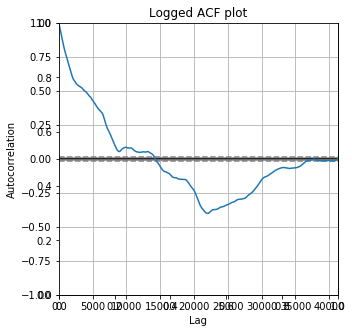

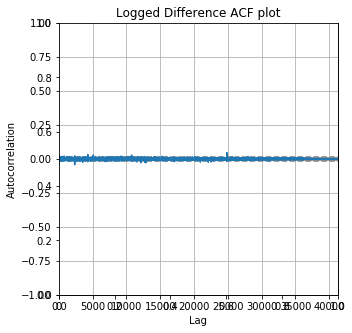

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax = autocorrelation_plot(data.logEBAY)
ax.set_title("Logged ACF plot")

fig, ax = plt.subplots(figsize=(5,5))
ax = autocorrelation_plot(data.diflogEBAY)
ax.set_title("Logged Difference ACF plot")

In [21]:
#perform Dickey-Fuller test

print("Result of Dickey-Fuller Test:")
dftest = adfuller(data.diflogEBAY, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Static','p-value','#Lag Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

Result of Dickey-Fuller Test:
Test Static                      -30.672310
p-value                            0.000000
#Lag Used                         46.000000
Number of Observations Used    41217.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


Because the test statistic is less than the 5% critical value and the p-value is lower than 0.05, the moving average is constant over time and the null hypothesis of the Dickey-Fuller test can be rejected. This shows that the weekly time series is stationary.

As it is stationary, before we apply ARIMA models for forecasting, we need not to transform this time series into a stationary time series.

In [22]:
ararray = (data.logEBAY.dropna().as_matrix())

p = 0
q = 0
d = 1
pdq = []
aic = []

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1,x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys,values))
minaic = min(d, key=d.get)

for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p,d,q))
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

(0, 1, 0) -486513.355751
(0, 1, 1) -486576.7506165372
(0, 1, 2) -486577.2058169206
(1, 1, 0) -486577.6826174202
(1, 1, 1) -486577.0089615865
(1, 1, 2) -486575.3242860292
(2, 1, 0) -486577.29516699375


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(2, 1, 1) -486574.32479552226
(2, 1, 2) -486573.35144204716
Best Model is : (1, 1, 0)


# Find optimal parameters and build an ARIMA model

To apply an ARIMA model to our time series, we need to find optimal values for the following three model parameters (p,d,q):
The number of autoregressive (AR) terms (p): AR terms are just lags of the dependent variable. So, if p=2, it means that predictors of x(t) will be x(t-1) and x(t-2).

The number of moving average (MA) terms (q): MA terms are lagged forecast errors in the prediction equation. For instance, if q=2, the predictors for x(t) will be e(t-1) and e(t-2) where e(i) is the difference between the moving average at i-th instant and the actual value.

The number of differences (d): These are the number of non-seasonal differences. In our case, d=1, as we are modeling using the first order differenced time series.
There are two ways to determine the number of AR and MA terms. The first is to use the arma_order_select_ic function in Python. The second uses plots of the autocorrelation function (ACF) and partial autocorrelation function (PACF).

In [23]:
ARIMIAmod

In [24]:
ARIMIAmod.predict(typ='levels').shape

(41263,)

In [25]:
data.shape

(41264, 4)

In [26]:
len(ARIMIAmod.predict())

41263

In [27]:
data.loc[1:, 'predict'] = ARIMIAmod.predict(typ='levels')
data.head()

C:\Users\pc\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


ValueError: Must have equal len keys and value when setting with an iterable

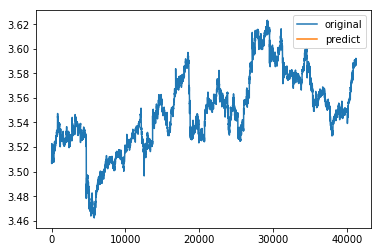

In [29]:
plt.plot(data['logEBAY'][1:], label='original')
plt.plot(data.predict[1:], label='predict')
plt.legend()

In [30]:
np.mean(np.shape(np.array((data['diflogEBAY'] - data['predict']))))

41264.0

In [31]:
numofsteps = 10
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

array([[ 3.58555556,  3.58816403],
       [ 3.58505336,  3.58866913],
       [ 3.5846629 ,  3.58906341],
       [ 3.58433255,  3.58939756],
       [ 3.58404099,  3.58969291],
       [ 3.58377716,  3.58996053],
       [ 3.58353443,  3.59020705],
       [ 3.58330845,  3.59043683],
       [ 3.58309619,  3.59065288],
       [ 3.58289543,  3.59085743]])

In [32]:
stepahead

array([ 3.58685979,  3.58686124,  3.58686316,  3.58686505,  3.58686695,
        3.58686885,  3.58687074,  3.58687264,  3.58687453,  3.58687643])

In [33]:
data['error'] = (data['logEBAY'] - data['predict'])
data['sqrError'] = np.square(data['error'])
data['absError'] = np.abs(data['error'])

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [34]:
data.head()

,DATE,EBAY,logEBAY,diflogEBAY,predict,error,sqrError,absError
1,1491226260,33.395,3.508406,-0.000449,NaN,NaN,NaN,NaN
2,1491226320,33.410,3.508855,0.002247,NaN,NaN,NaN,NaN
3,1491226380,33.335,3.506608,-0.001948,NaN,NaN,NaN,NaN
4,1491226440,33.400,3.508556,-0.000898,NaN,NaN,NaN,NaN
5,1491226500,33.430,3.509454,-0.001046,NaN,NaN,NaN,NaN


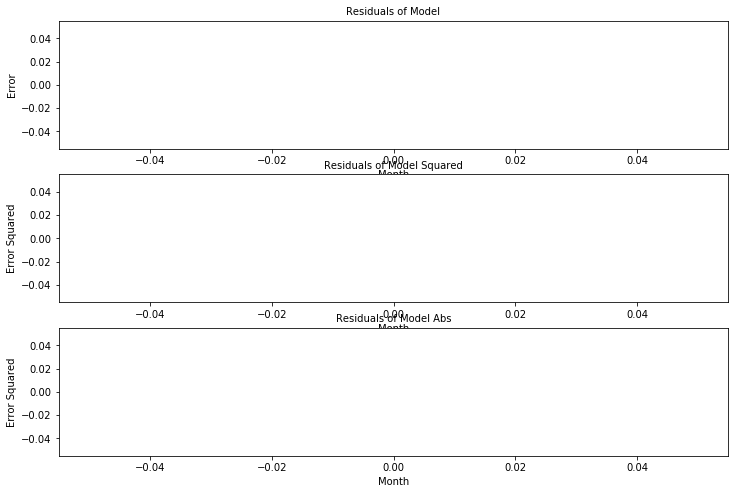

In [35]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(data.error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.absError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Abs", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


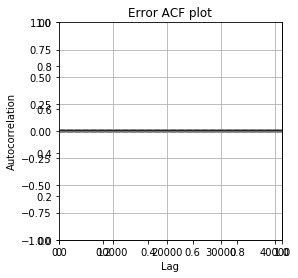

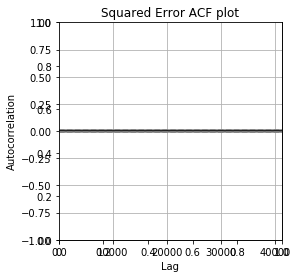

In [36]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(data.error)
ax.set_title('Error ACF plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(data.sqrError)
ax.set_title('Squared Error ACF plot')

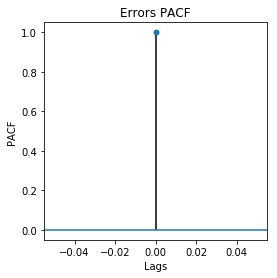

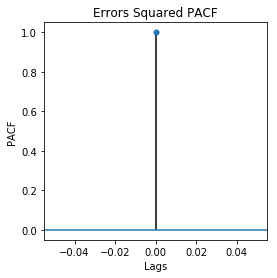

In [37]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.error, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

In [38]:
test = df[['DATE','EBAY','logEBAY','diflogEBAY']][-100:]

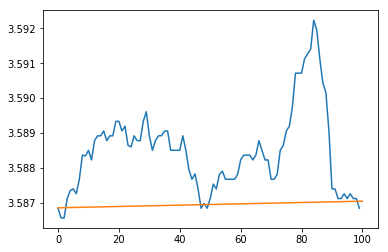

In [39]:
plt.plot(test.reset_index().logEBAY)
plt.plot(ARIMIAmod.predict(start=data.shape[0], end=data.shape[0]+100, typ='levels'))

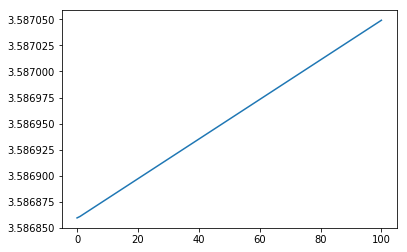

In [40]:
plt.plot(ARIMIAmod.predict(start=data.shape[0], end=data.shape[0]+100, typ='levels'))

In [41]:
test = test.reset_index()

In [42]:
ARIMIAmod.forecast(1)[0]

array([ 3.58685979])

In [45]:
ararray = list(data.logEBAY.values)
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

In [46]:
test_logEBAY = list(test.logEBAY.values)

In [47]:
ararray = list(data.logEBAY.values)
test_predict = []
for i in range(99):
    print(i)
    ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
    test_predict.append(ARIMIAmod.forecast(1)[0])
    ararray.append(test_logEBAY[i])

0
1


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


46
47
48
49
50
51
52
53
54


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


72
73


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


74
75
76
77
78
79
80
81
82
83


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


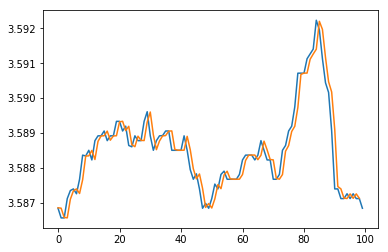

In [48]:
plt.plot(test_logEBAY)
plt.plot(np.array(test_predict).ravel())

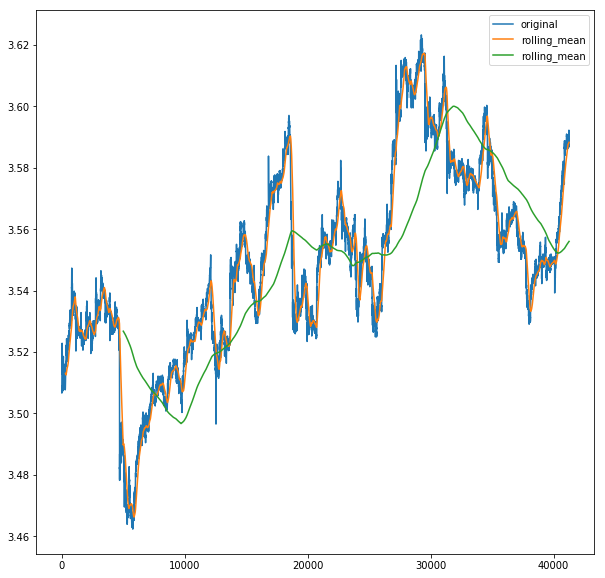

In [49]:
plt.figure(figsize=(10,10))
plt.plot(data.logEBAY, label='original')
plt.plot(data.logEBAY.rolling(300).mean(), label='rolling_mean')
plt.plot(data.logEBAY.rolling(5000).mean(), label='rolling_mean')
plt.legend()

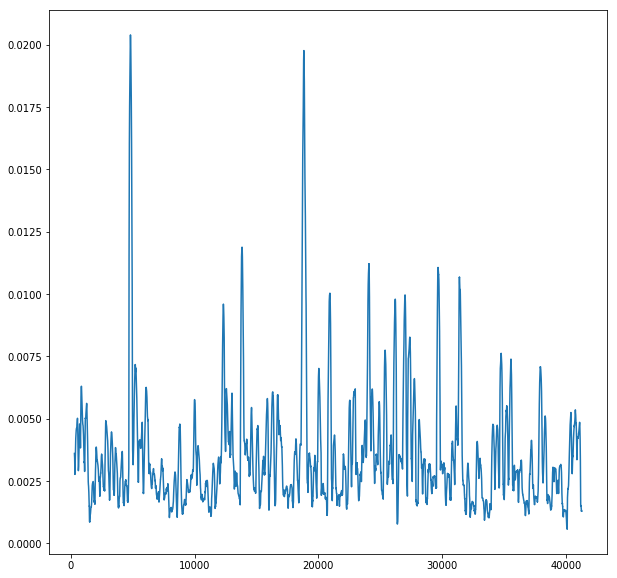

In [50]:
plt.figure(figsize=(10,10))
plt.plot(data.logEBAY.rolling(300).std())

Measure the variance between the data and the values predicted by the model
We can measure whether the results of your model fit the underlying data by using the residual sum of squares (RSS) metric. A small RSS indicates that the model fits tightly to the data.

Yet another approach to validate the ARIMA model appropriateness is by performing residual analysis.

Print the results of the ARIMA model and plot the residuals. A density plot of the residual error values indicates a normal distribution centered around zero mean. Also, the residuals do not violate the assumptions of constant location and scale with most values in the range (-1,1).

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                41361
Model:                 ARIMA(1, 1, 0)   Log Likelihood              243901.632
Method:                       css-mle   S.D. of innovations              0.001
Date:                Wed, 14 Nov 2018   AIC                        -487797.263
Time:                        23:07:55   BIC                        -487771.373
Sample:                             1   HQIC                       -487789.081
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.898e-06   3.14e-06      0.604      0.546   -4.26e-06    8.06e-06
ar.L1.D.y     -0.0398      0.005     -8.101      0.000      -0.049      -0.030
                                    Roots           

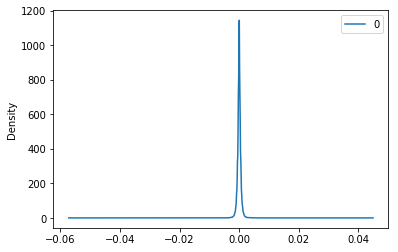

In [51]:
from pandas import DataFrame

print(ARIMIAmod.summary())
# plot residual errors
residuals = DataFrame(ARIMIAmod.resid)
residuals.plot(kind='kde')
print(residuals.describe())